In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['font.family']=['Cambria'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [2]:
results_dir = "./results"
values = defaultdict(list)
errors = defaultdict(list)
for fn in ['emb'] + list(range(9)):
    lines = open(os.path.join(results_dir, str(fn)+".eval"), "r").readlines()
    for line in lines:
        orga, avg, stdev = line.strip().split()
        values[orga].append(float(avg))
        errors[orga].append(float(stdev))

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


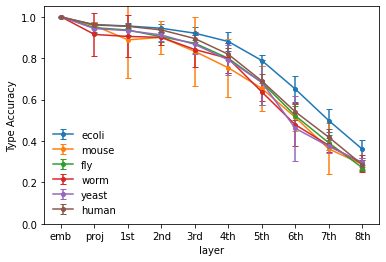

In [3]:
fig = plt.subplot()
xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]

fig.set_xlim(0.5, 10.5, 1)
fig.set_ylim(0, 1.05)
fig.set_xlabel("layer")
fig.set_ylabel("Type Accuracy")
fig.set_xticks(range(1, 11), xticks)
# fig.grid(axis="y", linestyle="--")

for idx, orga in enumerate(values):
    fig.errorbar(xs, values[orga], yerr=errors[orga], label=orga, capsize=3, marker="o", ms=4)
    
fig.legend(frameon=False)
plt.savefig("./type_classify.pdf", bbox_inches='tight')

